# **ENSEMBLE LEARNING**
## FACEBOOK DEVELOPERS CIRCLE, NCR
### SHREY BATRA

Often in real circumstances of binary classification we see that the negative class often dominates the positive class leading to the problem that the model was not able to learn enough complexities to correctly classify the
label which are lower in comparison.
Ensemble is the art of combining diverse set of learners (individual models) together to improvise on the stability and predictive power of the model (make it more robust).
Accuracy in these datasets are mostly high, but the prediction of negetive class is mostly wrong in native ML algorithms like Decision Tree, Naive Bayes, etc. **There can be situations where the prediction of positive class (inferior in the dataset) is much more important than predicting the negetive class (dominant class in dataset).** Ensemble helps us overcome this. When we try to predict the target variable using any machine learning technique, the main causes of difference in actual and predicted values are noise, variance, and bias. Ensemble helps to reduce these factors (except noise, which is irreducible error).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 7]

## Analysing dataset

## **Churn dataset**
The dataset being used is titled **Churn in Telecom Dataset** which tells us metadata or information regarding the users who have discontinued their subscription to telecom service. The metadata or information consist of the various features like state, day charge, day calls etc. of the users along with the label telling us whether the user or customer has churned his subscription or not. **Churn is a problem for telecom companies as it is more expensive for them to acquire a new customer and thus predictive modelling is best suited here as companies can
use the metadata to determine the customers who are more likely to churn and therefore can provide them with special incentives to keep them in the loop.**

In [2]:
churn_df = pd.read_csv('/home/shreybatra/Downloads/churndataset.csv')

In [3]:
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

**We can see below that the class in concern (True class) is highly unbalanced with respect to the False class. This is the _target feature_ which we have to predict. Ensemble learning is specially used in these cases as it has different techniques to overcome mis-predicted positive class instances. Some famous algorithms include Bagging and Boosting algorithms.**

In [5]:
churn_df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

** In the pie chart below, the _Red_ zone depicts the positive class which we are interested to predict.**

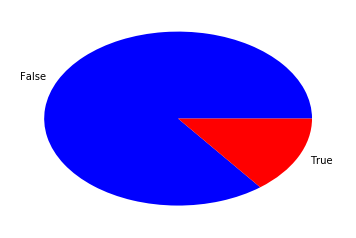

In [6]:
plt.pie(x = churn_df.churn.value_counts(), labels=['False','True'], colors=['blue','red'])
plt.show()

## Pre Processing, cleaning of data

Before the actual learning and training of data, the data needs to be cleaned, missing values needs to be handled, etc.

In [7]:
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Lets check for missing data by plotting a heat map which indicated any yellow rows for missing data. The heatmap below shows that there is no missing data in our dataset.**

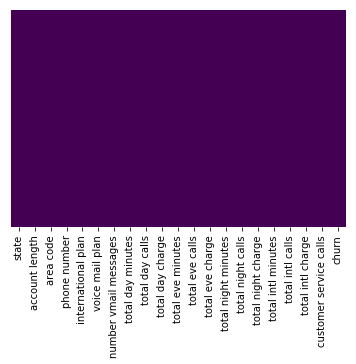

In [8]:
sns.heatmap(data=churn_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
churn_df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [10]:
churn_df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

**As we can see above there are 2 columns ('international plan' and 'voice mail plan') which has boolean value of yes and no. We can map this to binary 1/0 or to dummies also.**

**User defined function to map yes and no to 1 and 0.**

In [11]:
def change_yes_no(cols):
    if cols=='yes':
        return 1
    return 0

In [12]:
churn_df['international plan'] = churn_df['international plan'].apply(change_yes_no)

In [13]:
churn_df['voice mail plan'] = churn_df['voice mail plan'].apply(change_yes_no)

In [14]:
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Now we can see that there is a column 'phone-numer' which is of type object and can be made into integer by formating the phone number as a single integer.**

**User defined function to convert phone number to a single number.**

In [15]:
def conv(cols):
    l = cols.split('-')
    return int(''.join(l))

In [16]:
churn_df['phone number'] = churn_df['phone number'].apply(conv)

In [17]:
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,3824657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


** Now there is one more column left for pre processing. We can see that the column 'state' has a number of different codes but can have only limited number of them. So lets map them to a single integer for better processing.**

In [18]:
len(churn_df.state.unique())

51

In [19]:
np_keys = churn_df['state'].unique()
np_keys

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [20]:
np_values = np.arange(1,52,1)
np_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])

In [21]:
mp = dict(zip(np_keys,np_values))
print(mp)

{'NY': 14, 'AZ': 21, 'WA': 41, 'WV': 9, 'SD': 39, 'FL': 19, 'OR': 33, 'GA': 28, 'DC': 44, 'IA': 12, 'MN': 38, 'KY': 45, 'RI': 11, 'MS': 47, 'VA': 17, 'SC': 22, 'NC': 40, 'IN': 10, 'MI': 34, 'CA': 37, 'HI': 25, 'CT': 50, 'ME': 46, 'NJ': 3, 'DE': 35, 'TX': 18, 'ND': 51, 'IL': 26, 'NH': 27, 'LA': 8, 'PA': 49, 'WY': 24, 'OH': 2, 'KS': 1, 'TN': 48, 'AR': 31, 'UT': 36, 'WI': 32, 'MA': 6, 'MO': 7, 'MD': 30, 'MT': 13, 'CO': 20, 'AK': 29, 'ID': 15, 'AL': 5, 'OK': 4, 'VT': 16, 'NE': 23, 'NV': 43, 'NM': 42}


**Now we have mapped the different state codes to different numbers which we can change in the original dataset.**

In [22]:
churn_df['state'] = churn_df['state'].apply(lambda x: mp.get(x))

In [23]:
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,1,128,415,3824657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,2,107,415,3717191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,3,137,415,3581921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,2,84,408,3759999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,4,75,415,3306626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Splitting dataset into features and labels along with training and testing data.

In [24]:
from sklearn.model_selection import train_test_split

**Seeing the dataset and thinking logically, almost all the features would be an important parameter to predict customers who are likely to churn, all except 'phone number' as individual phone numbers could not be a parameter to identify churn. So we break down our dataset into Features (X) and Labels (y) accordingly.**

In [25]:
X = churn_df.drop(['churn','phone number'], axis=1)
y = churn_df['churn']

In [26]:
X.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,1,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,3,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,2,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [27]:
y.tail(10)

3323     True
3324    False
3325    False
3326    False
3327    False
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, dtype: bool

**We now split both Features and Labels into training and testing datasets with the ratio of 7:3 (30% testing data). You can add any other random_state (seed) to generate the training and testing datasets.**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training different predictive models for evaluation later, to check the best amongst them.

## Decision Tree - Native ML algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt_model = DecisionTreeClassifier()

In [31]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
dt_predictions = dt_model.predict(X_test)

## Naive Bayes - Native ML algorithm

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb_model = GaussianNB()

In [35]:
nb_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [36]:
nb_predictions = nb_model.predict(X_test)

## Ensemble Algorithms - Bagging (Random Forest) and Boosting (Gradient Boosting)
### Bagging is a simple ensembling technique in which we build many independent predictors/models/learners and combine them using some model averaging techniques. (e.g. weighted average, majority vote or normal average). Each observation has the same probability to appear in all the models.
### Boosting is an ensemble technique in which the predictors are not made independently, but sequentially. This technique employs the logic in which the subsequent predictors learn from the mistakes of the previous predictors. Therefore, the observations have an unequal probability of appearing in subsequent models and ones with the highest error appear most.

## Random Forest (Bagging)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_model = RandomForestClassifier()

In [39]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rf_predictions = rf_model.predict(X_test)

## Gradient Boosting (Boosting)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gb_model = GradientBoostingClassifier(max_depth=3, verbose=True, random_state=15) 
# Random state to always come with same output. (Omit this for better result)

In [54]:
gb_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7519            0.49s
         2           0.7041            0.46s
         3           0.6693            0.42s
         4           0.6365            0.39s
         5           0.6109            0.37s
         6           0.5843            0.36s
         7           0.5632            0.35s
         8           0.5458            0.35s
         9           0.5308            0.36s
        10           0.5193            0.37s
        20           0.4145            0.30s
        30           0.3608            0.23s
        40           0.3293            0.19s
        50           0.3073            0.15s
        60           0.2940            0.12s
        70           0.2791            0.09s
        80           0.2673            0.06s
        90           0.2530            0.03s
       100           0.2433            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=15, subsample=1.0, verbose=True,
              warm_start=False)

In [56]:
gb_predictions = gb_model.predict(X_test)

## Evaluation of models
The accuracy or the no of correctly classified points is often not the best measure to calculate the effectiveness of the classifier. Accuracy relies on no of correctly classified points as a metric but in the unbalanced dataset it may be possible that model performs greatly in classifying the dominant class label but does poorly in overwhelmed class label. This will lead to situation in which the model wasn’t able to generalize well but still happen to have a high accuracy.

**Precision** calculates the ratio of correctly predicted positive observations to the total predicted positive observation. It calculates the classifier robustness to predict low no of false alarms (False Positive). It also could be used to understand the model performance towardness exactness, that the model has able to generalize well and is not predicting positive randomly and only to those which warrants it.

**Recall** calculates the ratio of correctly predicted positive observation to all observation in actual class. It can be also attributed as the measurement of sensitivity. It basically calculates the proportion to which the classifier was able to classify the positive classes accurately out of totally possible positive points.

**F1-Score** is the Harmonic mean of the Precision and Recall. It combines both precision and recall and is well suited to determine the performance of the dataset suffering from unbalanced labels. Throughout this paper this will be our metric to concern.

**Tp = True Positive , Fp = False Postive , Tn = True negative, Fn = False negative**

**Precision = Tp / (Tp + Fp)**

**Recall = Tp / (Tp + Fn)**

**F1 - Score = 2Tp / (2Tp + Fp + Fn)**

In [45]:
from sklearn.metrics import classification_report

### Decision Tree Report

In [46]:
print(classification_report(dt_predictions,y_test))

             precision    recall  f1-score   support

      False       0.94      0.95      0.95       846
       True       0.72      0.67      0.69       154

avg / total       0.91      0.91      0.91      1000



The Decision tree was able to obtain a respectable 91% score in all metrics. Delving deeper however cracks appear to show where the overpowered True class were able to manage an only 72% precision value and a 67 and 69 value on recall and f1 score respectively. The model isn’t performing as well and is not able to generalize the True positive class labels sufficiently. The low recall score means that classifier is performing a lot of false negatives in comparison which are inherently highly dangerous. **This dangerous nature of false negative can be supported by the fact by taking an example for instance in Breast cancer detection a false positive is acceptable than a false negative where one false negative prediction becomes a matter of life and death.**

### Naive Bayes Report

In [50]:
print(classification_report(nb_predictions, y_test))

             precision    recall  f1-score   support

      False       0.91      0.91      0.91       863
       True       0.45      0.47      0.46       137

avg / total       0.85      0.85      0.85      1000



Seen above, Naive bayes could not predict overall classes even accurately, nor have a high recall or f1 score. This model may be discarded for furthur comparisons.

### Random Forest Report

In [51]:
print(classification_report(rf_predictions,y_test))

             precision    recall  f1-score   support

      False       0.99      0.94      0.97       904
       True       0.63      0.94      0.75        96

avg / total       0.96      0.94      0.95      1000



There is a slight improvement in the classifier performance against the decision tree but only after delving further we were really able to determine where the classifier truly shines. A marked improvement can be seen in the recall score of True class label where there is substantially increase in the score of precision.

### Gradient Boosting Report

In [57]:
print(classification_report(gb_predictions,y_test))

             precision    recall  f1-score   support

      False       0.99      0.95      0.97       893
       True       0.70      0.93      0.80       107

avg / total       0.96      0.95      0.95      1000



The gradient Boosting classifier achieved the highest score across the board out of all classifiers. Equally impressive is the model high f1 and precision score on True class label indicating the model is able to able to generalize well on the overwhelmed labels. However subpar 70 recall score of the True class label still remains a point of concern which can be much more improved by tweaking the parameters such as epochs and learning rate.